In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pprint
import pandas as pd
import undetected_chromedriver as uc

#### To select Chrome as my driver
##### I have used undetected_chromedriver because the website was blocking my scraper
##### along with uc I'm also using my chrome profile. this basically makes it very hard to detect the scrapper

In [2]:
options = webdriver.ChromeOptions()
options.add_argument("--user-data-dir=C:/Users/SHAHEER/AppData/Local/Google/Chrome/User Data/Default")
driver = uc.Chrome(options= options)

#### To open website

In [3]:
driver.get("https://www.st.com/content/st_com/en.html")

#### To click on product button on NavBar

In [8]:
driver.implicitly_wait(10)
# driver.find_element(By.CSS_SELECTOR, '#Top_Menu_Products > span:nth-child(1)').click()
# driver.find_element(By.XPATH, '//span[text()=" Products "]').click()
driver.find_element(By.XPATH, '//*[@id="Top_Menu_Products"]/span').click()

#### To find all categories listed in the sidebar. it will find all products such as Amplifier and comparators, Audio ICs, Automotive ADAS ... 

In [9]:
categories = driver.find_elements(By.CLASS_NAME, 'st-nav__submenu-item')

#### i'm going to click each button in navbar iteratively and copy all of the subcategories in categories_list. 

In [10]:
categories_list = []
for category in categories:
    if len(category.text) != 0:
        print(category.text)
        # this will click on each product on the navbar iteratively
        category.click()
        # now we will find all the subcategories of each product
        subCategories = driver.find_elements(By.CLASS_NAME, 'st-nav__blockmenu-item')
        for subCategory in subCategories:
            # for some reason it subCategories conatins empty text
            # so we are removing the empty ones
            if len(subCategory.text) != 0:
                url = subCategory.find_element(By.XPATH, ".//a")
                url = url.get_attribute('href')
                categories_list.append({"product_name":category.text,"subCategory_name":subCategory.text,"subCategory_url":url})
        
    

Amplifiers and Comparators
Audio ICs
Automotive ADAS Devices
Automotive Analog and Power
Automotive Infotainment and Telematics
Automotive Logic ICs
Automotive Microcontrollers
Clocks and Timers
Data Converters
Digital Set-Top Box ICs
Diodes and Rectifiers
Imaging and Photonics Solutions
Interfaces and Transceivers
Memories
MEMS and Sensors
Microcontrollers & Microprocessors
Motor Drivers
NFC
Positioning
Power Management
Power Modules and IPM
Power Transistors
Protections and EMI filters
Radio Frequency Transistors
Reset and Supervisor ICs
Secure MCUs
SiC Devices
Space Products
Switches and Multiplexers
Thyristors (SCR) and AC Switches
Touch and Display Controllers
Wireless Connectivity


#### you can see the categories_list here
#### i'm also saving it as csv file (i was using it for test purposes)

In [11]:
pd.DataFrame(categories_list).to_csv('sample.csv', index=False)
pd.DataFrame(categories_list)

,product_name,subCategory_name,subCategory_url
0,Amplifiers and Comparators,Automotive Comparators,https://www.st.com/en/amplifiers-and-comparato...
1,Amplifiers and Comparators,High-Speed Comparators,https://www.st.com/en/amplifiers-and-comparato...
2,Amplifiers and Comparators,Low Power Comparators,https://www.st.com/en/amplifiers-and-comparato...
3,Amplifiers and Comparators,Standard Comparators,https://www.st.com/en/amplifiers-and-comparato...
4,Amplifiers and Comparators,Automotive Op Amps,https://www.st.com/en/amplifiers-and-comparato...
...,...,...,...
204,Wireless Connectivity,Bluetooth Low Energy network co-processors,https://www.st.com/en/wireless-connectivity/bl...
205,Wireless Connectivity,Matter Products,https://www.st.com/en/wireless-connectivity/ma...
206,Wireless Connectivity,Thread Products,https://www.st.com/en/wireless-connectivity/th...
207,Wireless Connectivity,Ultra Wideband Products,https://www.st.com/en/wireless-connectivity/ul...


#### Now we have to goto each subCategory url and store the data 

In [13]:
categories_list[0]['subCategory_url']

'https://www.st.com/en/amplifiers-and-comparators/automotive-comparators.html'

In [17]:
product_list = []
for category in categories_list:
    # goto the webpage of subCategory
    driver.get(category['subCategory_url'])
    # to find and click on the 'Product Selector' button 
    driver.find_element(By.XPATH, '//span[text()=" Product selector "]').click()
    # on the bottom of the page, we have a dropdown from 
    # which we need to select 'ALL' to view all the products on 
    # the same page. 
    driver.implicitly_wait(10)
    driver.find_element(By.XPATH, '//*[@id="st-site"]/div[1]/div[1]/main/div[2]/div[5]/div[3]/div/div[3]/div[2]/div[3]/div/div/div[2]/span').click()
    driver.find_element(By.CSS_SELECTOR, '#st-site > div.off-canvas-wrap > div.inner-wrap > main > div.js-st-micro.stmicro.cxv1.js-st-sidebar-default.productFolder-page-marker > div.st-page-content.js-st-page-content > div:nth-child(4) > div > div.stsel-product-selector > div.product-selector-body.closed > div.st-row.st-row--content-width.clearfix > div > div > div.selectric-items > div > ul > li.last').click()
    # this will select all the product selector body which conatins the table of 
    # all the products
    product_selector_body = driver.find_elements(By.CLASS_NAME, 'product-selector-body')
    for product_selector in product_selector_body:
        # this will find the Table rows 
        table_rows = product_selector.find_elements(By.XPATH, ".//tr")
        for row in table_rows:
            # each row conatins product_name and description
            if len(row.text) != 0 and 'Compare' not in row.text:
                product_list.append({'product_category': category['product_name'], 'subCategory_name': category['subCategory_name'], 'product': row.text})
    # Note 
    # i'm breaking the loop to only scrap from one url
    # reason: i have came home due to an emergency and ptcl decided that he hate me,
    # so i have very poor internet connection
    # you can simply uncomment the break statment and it should scrap all urls
    break    
        


In [33]:
df = pd.DataFrame(product_list)
pd.DataFrame(product_list)

,product_category,subCategory_name,product
0,Amplifiers and Comparators,Automotive Comparators,LM2903B\nACTIVE\nLow power dual voltage compar...
1,Amplifiers and Comparators,Automotive Comparators,TS3021\nACTIVE\nRail-to-rail 1.8 V high-speed ...
2,Amplifiers and Comparators,Automotive Comparators,LM2901\nACTIVE\nLow power quad voltage compara...
3,Amplifiers and Comparators,Automotive Comparators,LM2901H\nACTIVE\nLow power quad voltage compar...
4,Amplifiers and Comparators,Automotive Comparators,LM2903\nACTIVE\nLow power dual voltage compara...
5,Amplifiers and Comparators,Automotive Comparators,LM2903H\nACTIVE\nLow power dual voltage compar...
6,Amplifiers and Comparators,Automotive Comparators,LM2903W\nACTIVE\nLow power dual voltage compar...
7,Amplifiers and Comparators,Automotive Comparators,LM2903WH\nACTIVE\nLow power dual voltage compa...
8,Amplifiers and Comparators,Automotive Comparators,TS3011\nACTIVE\nRail-to-rail high-speed compar...
9,Amplifiers and Comparators,Automotive Comparators,TS3021H\nACTIVE\nRail-to-rail 1.8 V high-speed...


#### now i'm going to split the product column to get product_name and description


In [34]:
product_name = []
description = []
for product in product_list:
    product_detail = product['product'].split('\n')
    product_name.append(product_detail[0])
    description.append(product_detail[2])
    
df['product_name'] = product_name
df['description'] = description

#### this is the final data that is going in the database

In [37]:
# beacuse we have already seperated the product_name and description we don't really need product column anymore
df = df.drop('product', axis=1)
df.head()

,product_category,subCategory_name,product_name,description
0,Amplifiers and Comparators,Automotive Comparators,LM2903B,"Low power dual voltage comparator MiniSO-8, QF..."
1,Amplifiers and Comparators,Automotive Comparators,TS3021,Rail-to-rail 1.8 V high-speed comparator SC70-...
2,Amplifiers and Comparators,Automotive Comparators,LM2901,"Low power quad voltage comparator QFN-16L, SO-..."
3,Amplifiers and Comparators,Automotive Comparators,LM2901H,Low power quad voltage comparator SO-14 Automo...
4,Amplifiers and Comparators,Automotive Comparators,LM2903,"Low power dual voltage comparator MiniSO-8, QF..."


In [39]:
list_of_dicts = df.to_dict(orient='records')
list_of_dicts[0]

{'product_category': 'Amplifiers and Comparators',
 'subCategory_name': 'Automotive Comparators',
 'product_name': 'LM2903B',
 'description': 'Low power dual voltage comparator MiniSO-8, QFN-8L WF, SO-8, TSSOP-8L Automotive, Industrial 2 -40 125 400 2 36 1.3 5 Open Collector 0.2948'}

#### now we are going to insert everything in the database
#### i can do this like i have done in Task1 but 
#### i don't have that much time left 

In [41]:
from database import engine, SessionLocal
import model
from model import products

### This will create schema in mySql database
#### meaning it will create table:products 
#### in database: TASK2

In [50]:
# I admit there are better schemas to store this data
# but due to shortage of time i'm going with this one
 
model.Base.metadata.create_all(bind=engine)

In [44]:
# then to insert into products table
# i'm creating a list of rows
"""
    [{'product_category': 'Amplifiers and Comparators',
 'subCategory_name': 'Automotive Comparators',
 'product_name': 'LM2903B',
 'description': 'Low power dual voltage comparator MiniSO-8, QFN-8L WF, SO-8, TSSOP-8L Automotive, Industrial 2 -40 125 400 2 36 1.3 5 Open Collector 0.2948'},
 ]
"""
# bult_insert_mappings will insert all rows in the table at the same time
db = SessionLocal()
db.bulk_insert_mappings(products, list_of_dicts)
db.commit()




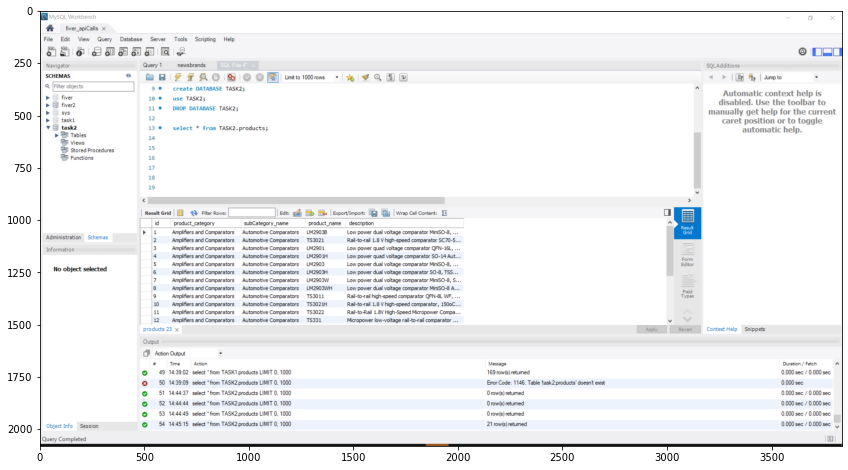

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(16, 8)) 
img = mpimg.imread('./mySql.PNG')
plt.imshow(img)
plt.show()
